In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.13.1


In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
# Loading the dataset returns four NumPy arrays:

# The train_images and train_labels arrays are the training set—the data the model uses to learn.
# The model is tested against the test set, the test_images, and test_labels arrays.
# The images are 28x28 NumPy arrays, with pixel values ranging between 0 and 255. 
# The labels are an array of integers, ranging from 0 to 9. These correspond to the class of clothing
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

len(class_names)

10

In [4]:
train_images.shape


(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

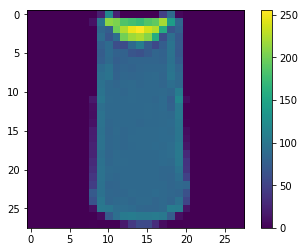

In [10]:
# The data must be preprocessed before training the network. If you inspect the first image in the training set, 
# you will see that the pixel values fall in the range of 0 to 255:
plt.figure()
plt.imshow(train_images[2])
plt.colorbar()
plt.grid(False)
plt.show()

In [11]:
# We scale these values to a range of 0 to 1 before feeding to the neural network model. 
# For this, we divide the values by 255. It's important that the training set and the testing set are preprocessed in the same way:
train_images = train_images / 255.0

test_images = test_images / 255.0

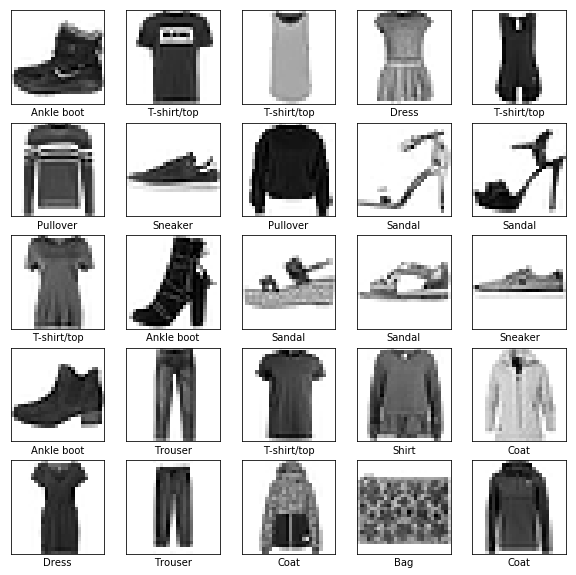

In [12]:
# Display the first 25 images from the training set and display the class name below each image. 
# Verify that the data is in the correct format and we're ready to build and train the network.

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [15]:
#Build the model
# Building the neural network requires configuring the layers of the model, then compiling the model.

# Setup the layers
# The basic building block of a neural network is the layer. Layers extract representations from the data fed into them. 
# And, hopefully, these representations are more meaningful for the problem at hand.

# Most of deep learning consists of chaining together simple layers. Most layers, like tf.keras.layers.
# Dense, have parameters that are learned during training.

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
    
])
  
# The first layer in this network, tf.keras.layers.Flatten, transforms the format of the images 
# from a 2d-array (of 28 by 28 pixels), to a 1d-array of 28 * 28 = 784 pixels. Think of this layer as unstacking rows of pixels in the image and lining them up. 
# This layer has no parameters to learn; it only reformats the data.

# After the pixels are flattened, the network consists of a sequence of two tf.keras.layers.Dense layers. 
# These are densely-connected, or fully-connected, neural layers. The first Dense layer has 128 nodes (or neurons). 
# The second (and last) layer is a 10-node softmax layer—this returns an array of 10 probability scores that sum to 1. 
# Each node contains a score that indicates the probability that the current image belongs to one of the 10 classes.

In [16]:
# Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:

# Loss function —This measures how accurate the model is during training. 
# We want to minimize this function to "steer" the model in the right direction.

# Optimizer —This is how the model is updated based on the data it sees and its loss function.

# Metrics —Used to monitor the training and testing steps. 
# The following example uses accuracy, the fraction of the images that are correctly classified.

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
# Train the model
# Training the neural network model requires the following steps:

# Feed the training data to the model—in this example, the train_images and train_labels arrays.
# The model learns to associate images and labels.
# We ask the model to make predictions about a test set—in this example, the test_images array. 
# We verify that the predictions match the labels from the test_labels array.
# To start training, call the model.fit method—the model is "fit" to the training data:

model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 45s 749us/sample - loss: 0.4848 - acc: 0.8261
Epoch 2/5
60000/60000 [==============================] - 36s 607us/sample - loss: 0.3651 - acc: 0.8668
Epoch 3/5
60000/60000 [==============================] - 37s 617us/sample - loss: 0.3281 - acc: 0.8798
Epoch 4/5
60000/60000 [==============================] - 38s 630us/sample - loss: 0.3098 - acc: 0.8847
Epoch 5/5
60000/60000 [==============================] - 41s 679us/sample - loss: 0.2911 - acc: 0.8928 - loss: 0.2921 - ac - ET


In [18]:
# Evaluate accuracy
# Next, compare how the model performs on the test dataset:

test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 3s 298us/sample - loss: 0.3379 - acc: 0.8795
Test accuracy: 0.8795


In [16]:
# This gap between training accuracy and test accuracy is an example of overfitting. 
# Overfitting is when a machine learning model performs worse on new data than on their training data.

In [19]:
# Make predictions
# With the model trained, we can use it to make predictions about some images.

predictions = model.predict(test_images)

In [20]:
# Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction:

predictions[1500]

array([2.0342948e-05, 1.0649001e-05, 1.7678854e-04, 9.4814730e-01,
       5.1116388e-02, 4.4745736e-08, 5.2647601e-04, 5.8858962e-10,
       2.0848108e-06, 2.8125924e-09], dtype=float32)

In [21]:
# A prediction is an array of 10 numbers. 
# These describe the "confidence" of the model that the image corresponds to each of the 10 different articles of clothing. 
# We can see which label has the highest confidence value:

np.argmax(predictions[1500])

3

In [22]:
# So the model is most confident that this image is an ankle boot, or class_names[9]. 
# And we can check the test label to see this is correct:

test_labels[1500]

3

In [23]:
# We can graph this to look at the full set of 10 class predictions

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)
  
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

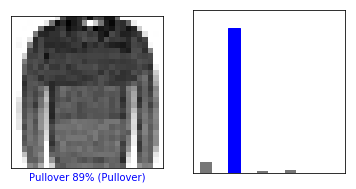

In [24]:
# Let's look at the 0th image, predictions, and prediction array.

i = 20
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

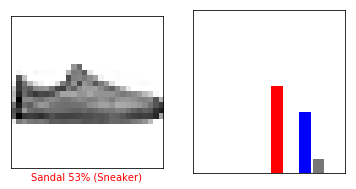

In [23]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

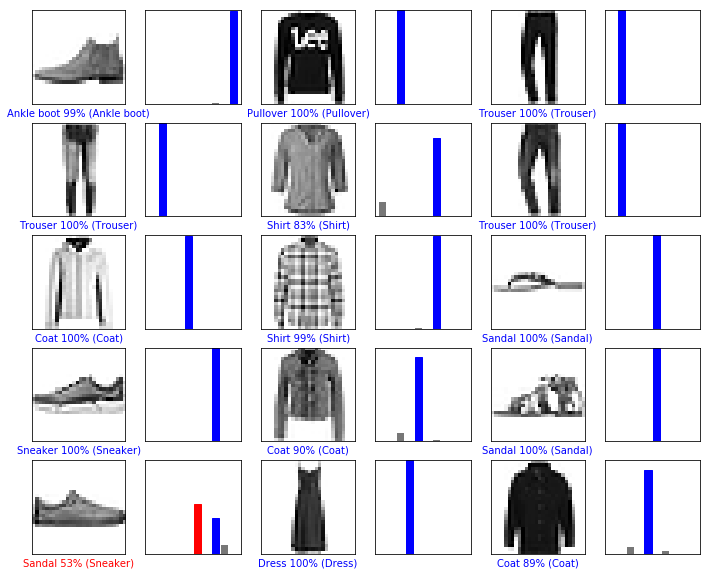

In [24]:
# Let's plot several images with their predictions. 
# Correct prediction labels are blue and incorrect prediction labels are red. 
# The number gives the percent (out of 100) for the predicted label. Note that it can be wrong even when very confident.

# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [25]:
# Finally, use the trained model to make a prediction about a single image.

# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28)


In [26]:
# tf.keras models are optimized to make predictions on a batch, or collection, of examples at once. 
# So even though we're using a single image, we need to add it to a list:

# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [27]:
# Now predict the image:

predictions_single = model.predict(img)

print(predictions_single)

[[7.7933896e-07 1.3698855e-08 4.5296505e-07 3.0130411e-07 9.5539761e-08
  1.0232580e-03 1.7562106e-06 8.0201905e-03 2.7637557e-06 9.9095041e-01]]


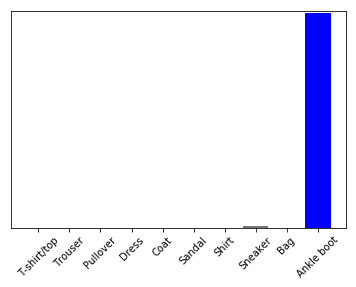

In [28]:
plot_value_array(0, predictions_single, test_labels)
plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [29]:
# model.predict returns a list of lists, one for each image in the batch of data. 
# Grab the predictions for our (only) image in the batch:

prediction_result = np.argmax(predictions_single[0])
print(prediction_result)

9


In [25]:
import nltk

In [ ]:
nltk.download()